In [ ]:
ls

drive/  sample_data/


In [ ]:
cd /content/drive/MyDrive/ASSIGNMENT_03

/content/drive/MyDrive/ASSIGNMENT_03


In [ ]:
pwd

'/content/drive/MyDrive/ASSIGNMENT_03'

In [ ]:
!unzip Flowers-Dataset.zip

Archive:  Flowers-Dataset.zip
  inflating: flowers/daisy/100080576_f52e8ee070_n.jpg  
  inflating: flowers/daisy/10140303196_b88d3d6cec.jpg  
  inflating: flowers/daisy/10172379554_b296050f82_n.jpg  
  inflating: flowers/daisy/10172567486_2748826a8b.jpg  
  inflating: flowers/daisy/10172636503_21bededa75_n.jpg  
  inflating: flowers/daisy/102841525_bd6628ae3c.jpg  
  inflating: flowers/daisy/10300722094_28fa978807_n.jpg  
  inflating: flowers/daisy/1031799732_e7f4008c03.jpg  
  inflating: flowers/daisy/10391248763_1d16681106_n.jpg  
  inflating: flowers/daisy/10437754174_22ec990b77_m.jpg  
  inflating: flowers/daisy/10437770546_8bb6f7bdd3_m.jpg  
  inflating: flowers/daisy/10437929963_bc13eebe0c.jpg  
  inflating: flowers/daisy/10466290366_cc72e33532.jpg  
  inflating: flowers/daisy/10466558316_a7198b87e2.jpg  
  inflating: flowers/daisy/10555749515_13a12a026e.jpg  
  inflating: flowers/daisy/10555815624_dc211569b0.jpg  
  inflating: flowers/daisy/10555826524_423eb8bf71_n.jpg  
  infla

1. IMAGE AUGMENTATION

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_data = ImageDataGenerator(rescale=1./255,zoom_range=0.4,horizontal_flip=True,vertical_flip=True)

In [ ]:
test_data = ImageDataGenerator(rescale=1./255)

2. CREATE MODEL

In [ ]:
x_train = train_data.flow_from_directory(r"/content/drive/MyDrive/ASSIGNMENT_03/Dataset/Flowers/Training",target_size=(64,64),class_mode="categorical",batch_size=30)

Found 4317 images belonging to 5 classes.


In [ ]:
x_test = test_data.flow_from_directory(r"/content/drive/MyDrive/ASSIGNMENT_03/Dataset/Flowers/Testing",target_size=(64,64),class_mode="categorical",batch_size=30)

Found 1980 images belonging to 5 classes.


In [ ]:
x_train.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

3. ADDING LAYERS


*   CONVOLUTION LAYER
*   MAX-POOLING LAYER
*   FLATTEN LAYER
*   DENSE LAYER



In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D,MaxPool2D,Flatten,Dense

In [ ]:
model = Sequential()

In [ ]:
model.add(Convolution2D(32,(3,3),activation="relu",strides=(1,1),input_shape=(64,64,3)))

In [ ]:
model.add(MaxPool2D(pool_size=(2,2)))

In [ ]:
model.add(Flatten())

In [ ]:
model.add(Dense(280,activation="relu"))
model.add(Dense(280,activation="relu"))

In [ ]:
model.add(Dense(5,activation="softmax"))

4. COMPILE THE MODEL

In [ ]:
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=['accuracy'])

5. FIT THE MODEL

In [ ]:
model.fit(x_train,epochs=10, steps_per_epoch=len(x_train),validation_data=x_test,validation_steps=len(x_test))

Epoch 1/10
144/144 [==============================] - 51s 352ms/step - loss: 0.7796 - accuracy: 0.6984 - val_loss: 0.6982 - val_accuracy: 0.7152
Epoch 2/10
144/144 [==============================] - 48s 334ms/step - loss: 0.7629 - accuracy: 0.7028 - val_loss: 0.7154 - val_accuracy: 0.7217
Epoch 3/10
144/144 [==============================] - 49s 339ms/step - loss: 0.7481 - accuracy: 0.7091 - val_loss: 0.7410 - val_accuracy: 0.7182
Epoch 4/10
144/144 [==============================] - 50s 349ms/step - loss: 0.7417 - accuracy: 0.7137 - val_loss: 0.7075 - val_accuracy: 0.7414
Epoch 5/10
144/144 [==============================] - 49s 338ms/step - loss: 0.7340 - accuracy: 0.7148 - val_loss: 0.6477 - val_accuracy: 0.7419
Epoch 6/10
144/144 [==============================] - 51s 353ms/step - loss: 0.7179 - accuracy: 0.7202 - val_loss: 0.6899 - val_accuracy: 0.7470
Epoch 7/10
144/144 [==============================] - 49s 341ms/step - loss: 0.6934 - accuracy: 0.7385 - val_loss: 0.6328 - val_ac

6. SAVE THE MODEL

In [ ]:
model.save("flowers1.h5")

7. TEST THE MODEL

In [ ]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [ ]:
model = load_model("flowers1.h5")

In [ ]:
image1 = image.load_img(r"/content/drive/MyDrive/ASSIGNMENT_03/Dataset/Flowers/Training/sunflower/1022552036_67d33d5bd8_n.jpg")

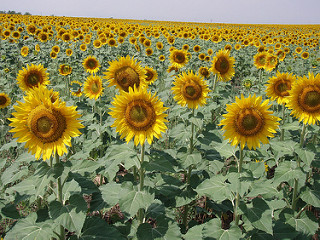

In [ ]:
image1

In [ ]:
image1 = image.load_img(r"/content/drive/MyDrive/ASSIGNMENT_03/Dataset/Flowers/Training/sunflower/1022552036_67d33d5bd8_n.jpg",target_size=(64,64))

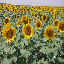

In [ ]:
image1

In [ ]:
x = image.img_to_array(image1)

In [ ]:
x

array([[[199., 198., 214.],
        [201., 200., 216.],
        [201., 200., 216.],
        ...,
        [187., 188., 208.],
        [186., 187., 207.],
        [184., 185., 205.]],

       [[197., 199., 214.],
        [199., 201., 216.],
        [201., 200., 216.],
        ...,
        [186., 187., 207.],
        [185., 186., 206.],
        [184., 185., 205.]],

       [[200., 200., 224.],
        [200., 191., 218.],
        [197., 203., 217.],
        ...,
        [188., 186., 207.],
        [188., 186., 207.],
        [187., 185., 206.]],

       ...,

       [[ 64.,  65.,  47.],
        [106., 120.,  95.],
        [116., 136., 109.],
        ...,
        [109., 130.,  97.],
        [117., 133., 106.],
        [104., 108.,  91.]],

       [[ 32.,  40.,  27.],
        [116., 145., 114.],
        [123., 141., 117.],
        ...,
        [ 24.,  54.,  28.],
        [ 92., 121.,  90.],
        [ 54.,  25.,  21.]],

       [[129., 125.,  18.],
        [147., 148., 143.],
        [114., 1

In [ ]:
x = np.expand_dims(x,axis = 0)

In [ ]:
pred = model.predict(x)

In [ ]:
pred

array([[0., 0., 0., 1., 0.]], dtype=float32)

In [ ]:
index = ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

In [ ]:
x_test.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

In [ ]:
index[np.argmax(pred)]

'sunflower'